In [15]:
import numpy as np
import pandas as pd
df = pd.read_excel("D:\Excelr_assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')
df

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_23032\442004067.py:3: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_excel("D:\Excelr_assignments\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name='data')


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
df.shape

(3999, 12)

In [17]:
df.info()

# we can say that all the data is in int data type:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
# finding the complete detail stats of the data set:

df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [19]:
# checking for the null values in the data set:

df.isnull().sum()

# and after that we can conform that null values are nut their in the data set:


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

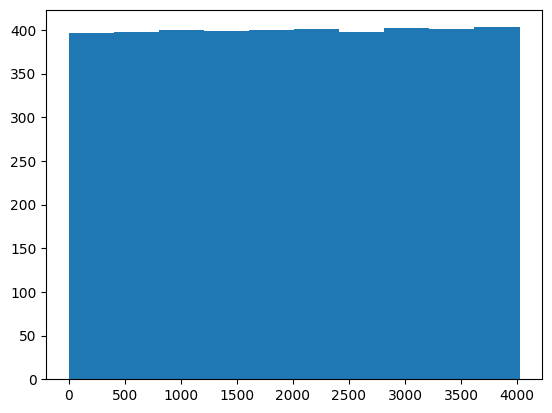

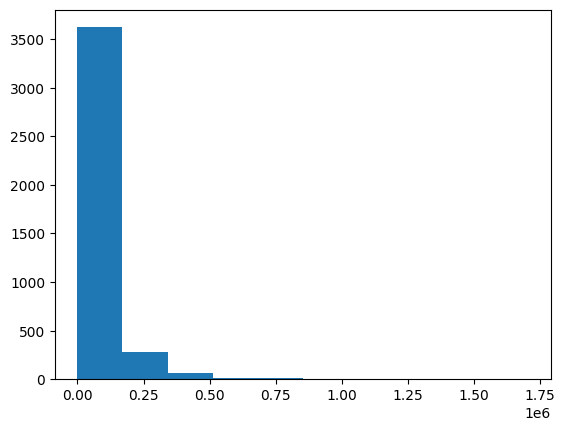

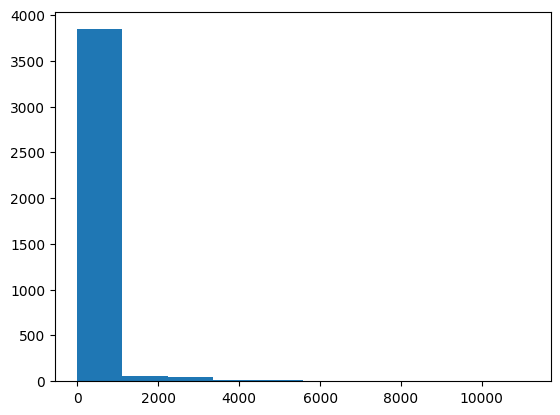

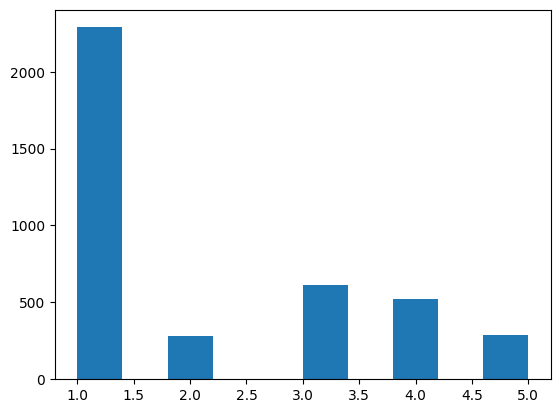

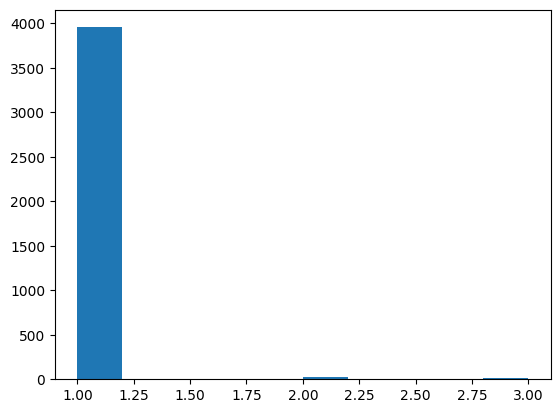

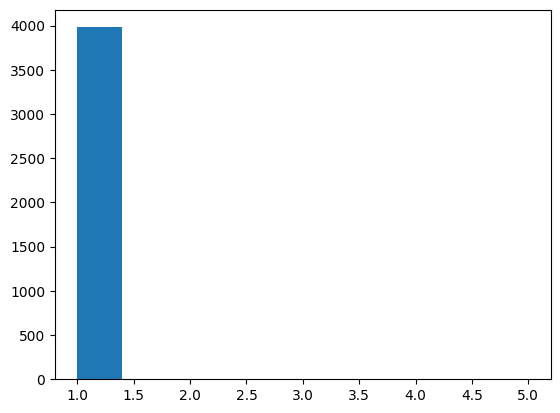

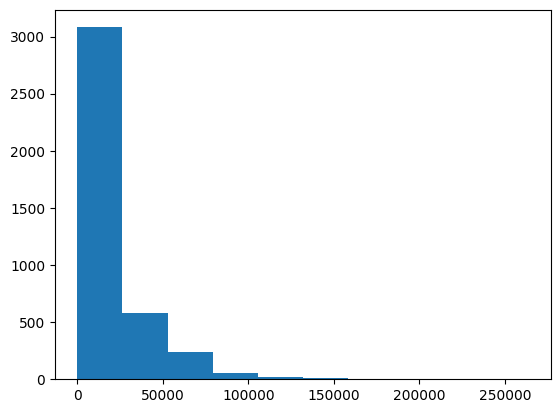

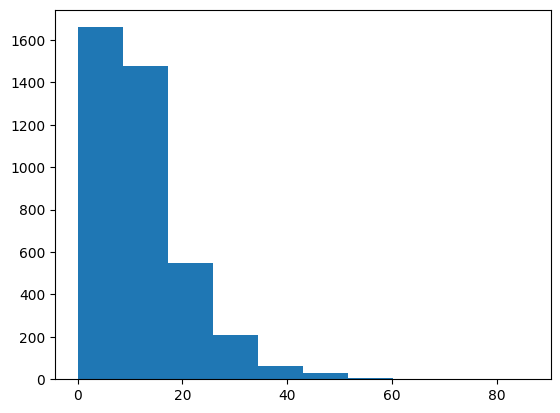

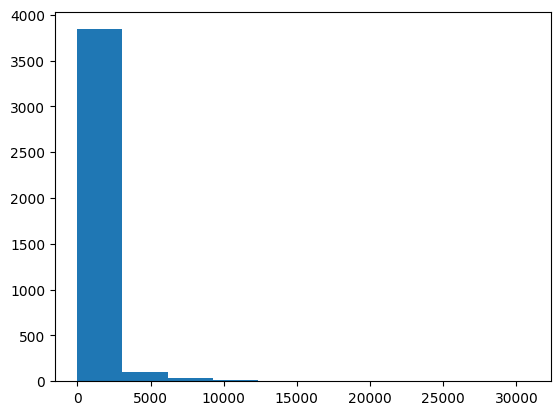

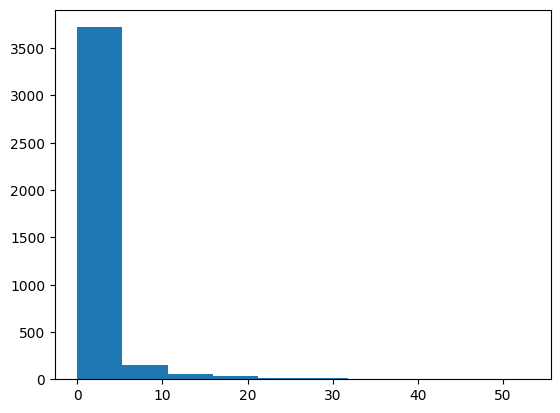

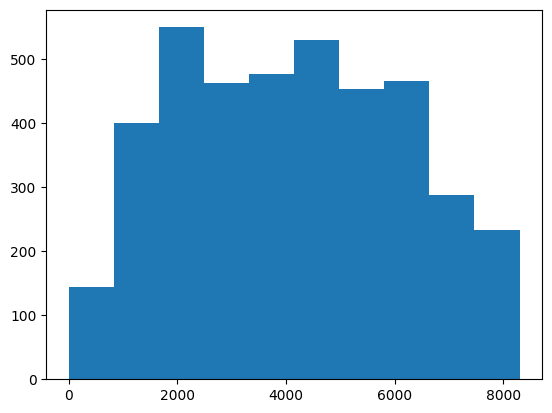

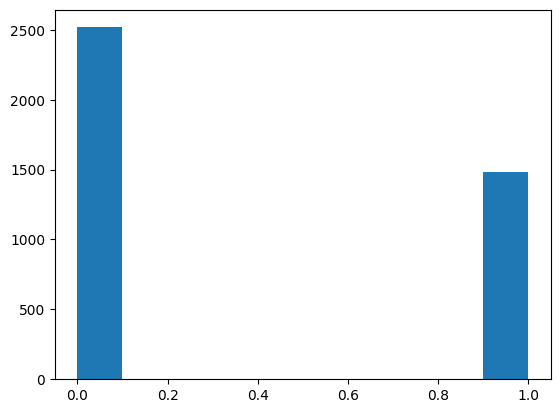

In [20]:
# ploting the histograms for the every features in the data set. :

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure()
    plt.hist(df[col])
    plt.show()

From the above graphs of every individual features in the data set. We can say that most of the features are having outlayers, and also most of the graphs are right skewed. And some are symmetric in nature.

<Axes: >

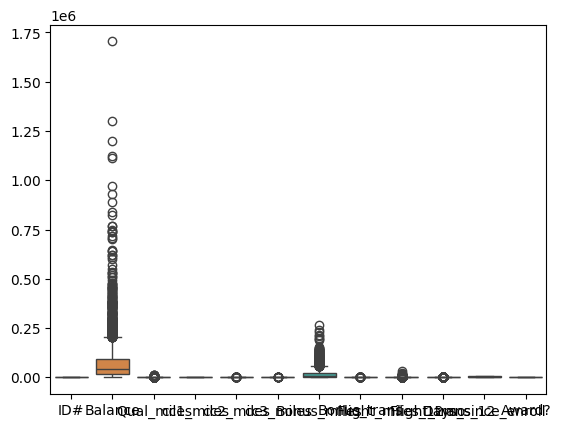

In [24]:
# ploting the data in a boxplot:

sns.boxplot(df)

In [25]:
# removing the outliers in the data set:

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
df = df[
        ~((df.lt(q1 - 1.5 * iqr)) | (df.gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

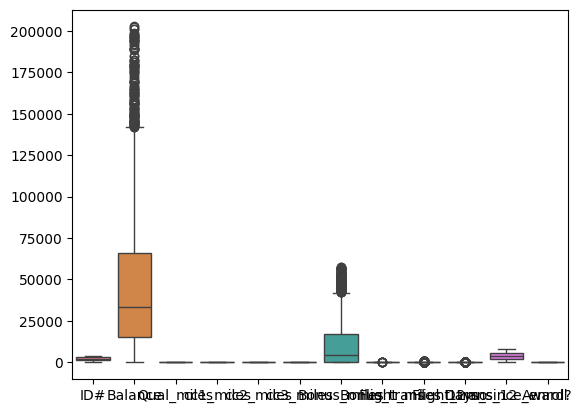

In [26]:
# ploting the data in a boxplot:

sns.boxplot(df)

We can see the difference on both the boxplots.
First boxplot containing the outlayers and second boxplot without outlayers.

In [27]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [28]:
# finding the correlation between the features.

df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.219303,NaN,-0.169538,NaN,NaN,-0.145075,-0.119038,-0.026990,-0.029340,-0.963634,-0.132266
Balance,-0.219303,1.000000,NaN,0.461179,NaN,NaN,0.456281,0.358318,0.158173,0.152763,0.236048,0.049305
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.169538,0.461179,NaN,1.000000,NaN,NaN,0.905322,0.629604,0.079288,0.065973,0.179651,0.330855
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.145075,0.456281,NaN,0.905322,NaN,NaN,1.000000,0.620072,0.107435,0.092804,0.153825,0.356086
Bonus_trans,-0.119038,0.358318,NaN,0.629604,NaN,NaN,0.620072,1.000000,0.104399,0.113083,0.132153,0.253705
Flight_miles_12mo,-0.026990,0.158173,NaN,0.079288,NaN,NaN,0.107435,0.104399,1.000000,0.858979,0.033528,0.122343
Flight_trans_12,-0.029340,0.152763,NaN,0.065973,NaN,NaN,0.092804,0.113083,0.858979,1.000000,0.032220,0.133199


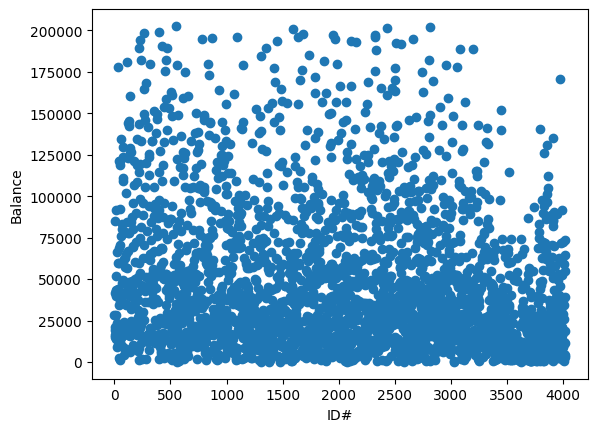

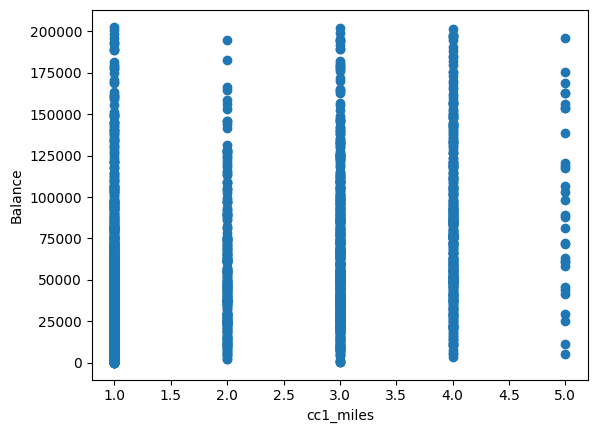

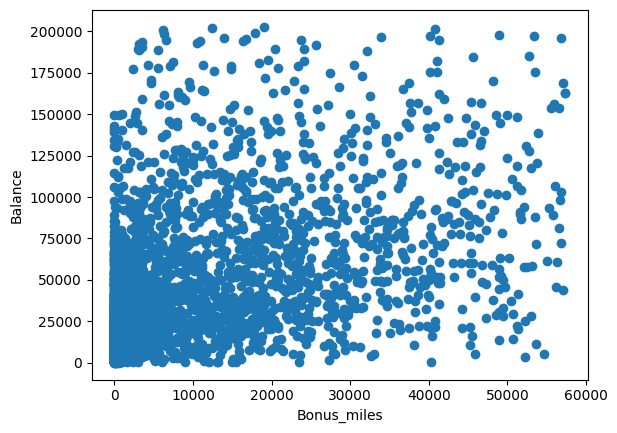

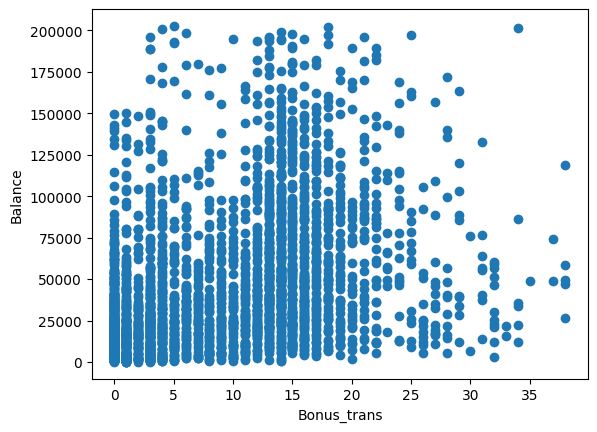

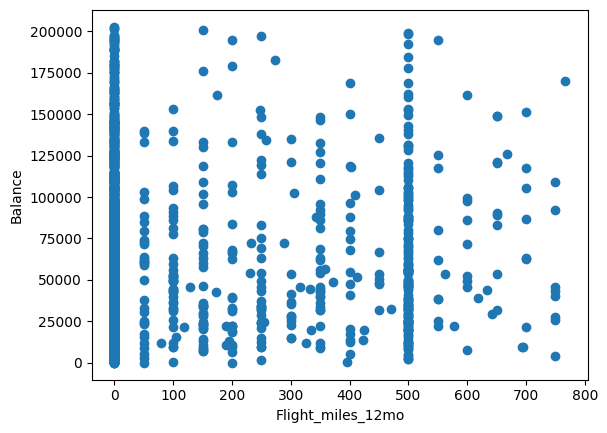

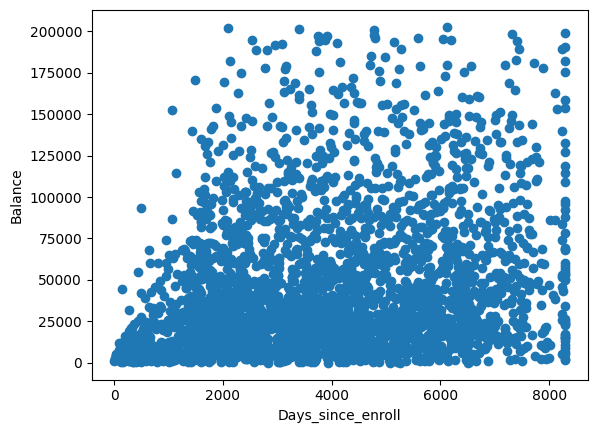

In [29]:
# scatter plot for the better understanding the data and the relationship between the features:

for col in ['ID#','cc1_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Days_since_enroll']:
    plt.figure()
    plt.scatter(x = df[col],y = df["Balance"])
    plt.xlabel(col)
    plt.ylabel('Balance')
    plt.show()

From the correlation table most of the features are having the correlation with the 'balance' column so i have checked the relation between the balance column and the remaining columns and find the results as above.

In [32]:
# data transformation on the data set:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_new = ss.fit_transform(df)
df_new = pd.DataFrame(df_new,columns = df.columns)
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.834643,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-1.833775,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-1.832907,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-1.832038,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-1.830302,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,1.652614,-0.665761,0.0,-0.719055,0.0,0.0,-0.171862,-0.694742,0.948432,1.653181,-1.235018,1.604952
2871,1.653482,0.411806,0.0,-0.719055,0.0,0.0,-0.724061,-0.565745,-0.378837,-0.409708,-1.238933,1.604952
2872,1.654350,0.628028,0.0,1.013789,0.0,0.0,1.066780,-0.178756,-0.378837,-0.409708,-1.235507,1.604952
2873,1.655219,0.189152,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,2.939335,1.653181,-1.235997,-0.623072


In [33]:
# modelfitting with the kmeans clustering :

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for i in range(2,11):
    model = KMeans(n_clusters= i,random_state=42)
    labels = model.fit_predict(df_new)
    score = silhouette_score(df_new,labels)
    scores.append(score)
scores  
    

[np.float64(0.29352950963373015),
 np.float64(0.30830264215957265),
 np.float64(0.28357826594485636),
 np.float64(0.25511873358173875),
 np.float64(0.2611348652617833),
 np.float64(0.27667556428735607),
 np.float64(0.26923734593388193),
 np.float64(0.22884688012119403),
 np.float64(0.22946209104768067)]

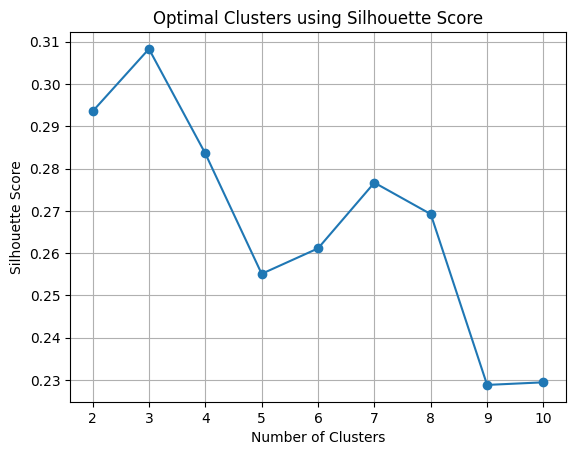

In [37]:
# ploting the Silhouette score  on the elbow curve graph:

plt.plot(range(2,11), scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Clusters using Silhouette Score")
plt.grid(True)
plt.show()

we got best Silhouette Score for k value = 3 that is we can form three best cluster with the dataset.
Silhouette Score = 0.308

In [65]:
# model building with the hierarchy clustering:

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linked =linkage(df_new, method='ward')


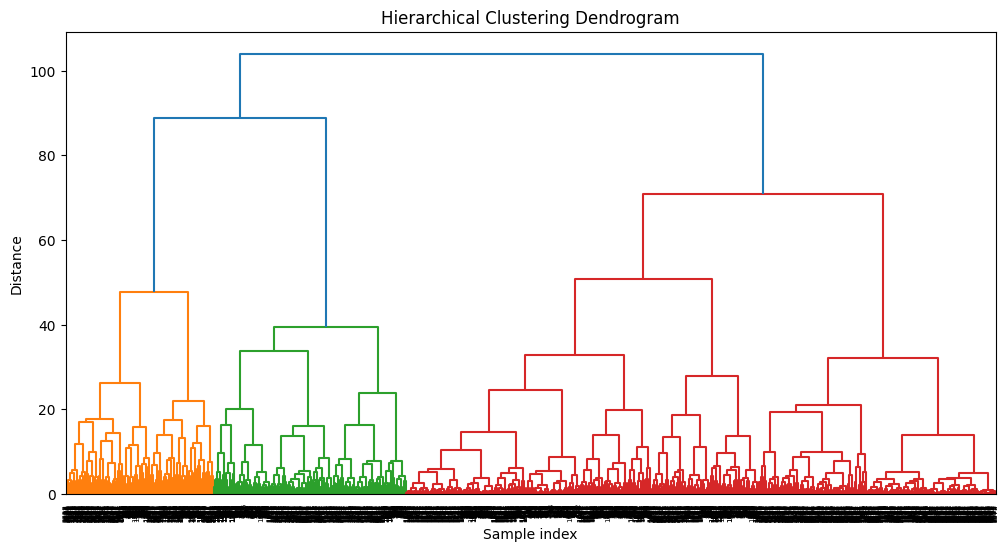

In [39]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [47]:
from sklearn.metrics import davies_bouldin_score

cluster_labels = fcluster(linked, t=3, criterion='maxclust')  # `t=3` means 3 clusters

# Optional: Evaluate clustering
print("Silhouette Score:", silhouette_score(df_new, cluster_labels))
print("Davies–Bouldin Index:", davies_bouldin_score(df_new, cluster_labels))


Silhouette Score: 0.27936255076255034
Davies–Bouldin Index: 1.378554612778806


With the help of hierarchy clustering we got Silhouette Score: 0.27 with the 3 clusters.

In [48]:
# model building with the dbscan clustering :

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_new)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 25
Estimated number of noise points: 1410


In [50]:
if n_clusters > 1:
    print("Silhouette Score:", silhouette_score(df_new, labels))
    print("Davies–Bouldin Index:", davies_bouldin_score(df_new, labels))
else:
    print("Cannot compute evaluation scores: only one cluster found.")


Silhouette Score: -0.33225832280910966
Davies–Bouldin Index: 1.5682727889679025


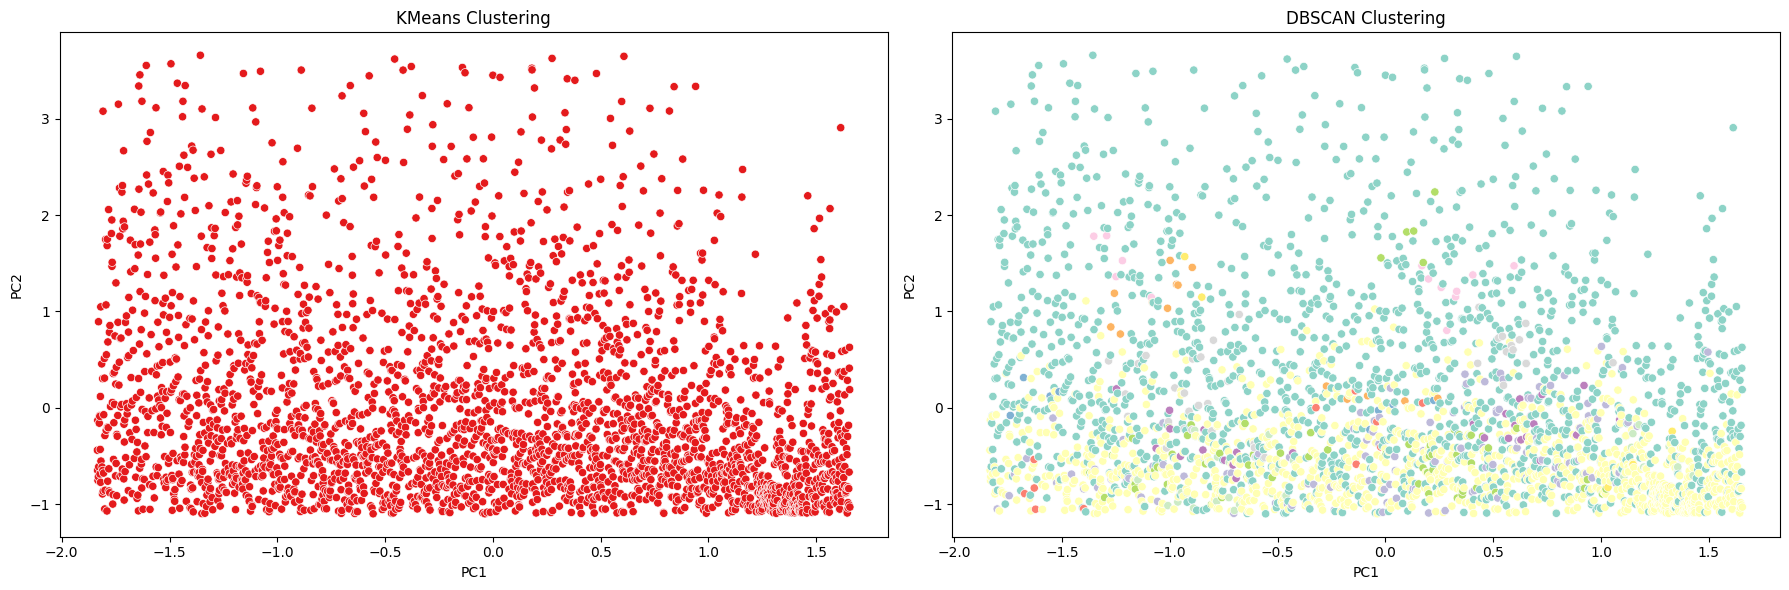

In [76]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot KMeans
sns.scatterplot(x=df_new.iloc[:, 0], y=df_new.iloc[:, 1],
                hue=model, palette='Set1', ax=axes[0], legend=False)
axes[0].set_title("KMeans Clustering")
sns.scatterplot(x=df_new.iloc[:, 0], y=df_new.iloc[:, 1],
                hue=labels, palette='Set3', ax=axes[1], legend=False)
axes[1].set_title("DBSCAN Clustering")

for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()


1.we got best Silhouette Score for k value = 3 that is we can form three best cluster with the dataset.
Silhouette Score = 0.308

2.With the help of hierarchy clustering we got Silhouette Score: 0.27 with the 3 clusters.
3.With the help of DBSCAN clustering we got the results in this way:
  Silhouette Score: -0.332

over all the k means clustering model gave me the best results in from the data set.

